In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('diabetes.csv')

In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [75]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

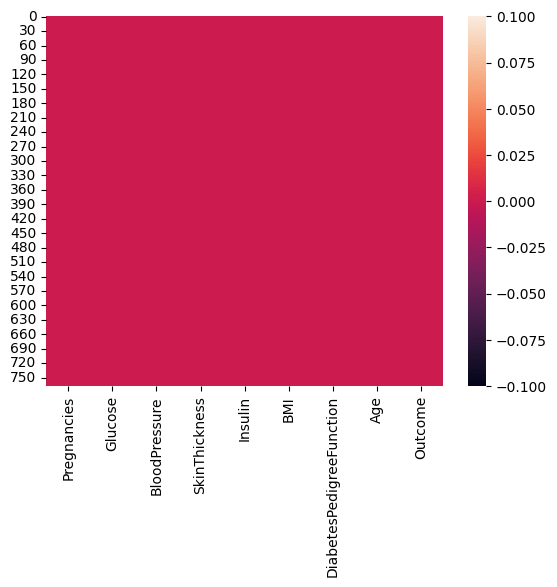

In [76]:
sns.heatmap(df.isnull())

In [77]:
X = df.drop(['Outcome'], axis=1)
y = df["Outcome"]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

In [81]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lassocv = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [82]:
lassocv.fit(X_train, y_train)

/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.640e-01, tolerance: 1.129e-02
  model = cd_fast.enet_coordinate_descent(
/Users/devayushrout/Desktop/ Regression Models/myenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e+01, tolerance: 1.117e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [83]:
print(lassocv.best_params_)

{'alpha': 0.001}


In [84]:
print(lassocv.best_score_)

-0.16555514134410182


In [87]:
y_pred = lassocv.predict(X_test)
y_pred

array([ 1.01921151,  0.2133837 ,  0.10330822,  0.60352012,  0.16791271,
       -0.05300338,  0.67142304,  0.7880384 ,  0.41142645,  0.3983961 ,
        0.54435601,  1.02499599,  0.34928658,  0.22152742,  0.15503376,
        0.21542704,  0.81159357, -0.10685612,  0.45380692,  0.30818683,
        0.60256914,  0.42091055,  0.28928305,  0.03295173,  0.00413392,
        0.3938789 , -0.00979087,  0.86993852,  0.15241432,  0.19867092,
        0.47886482,  0.29571662,  0.10662418,  0.4607829 ,  0.13914727,
        0.66128354,  0.47160046,  0.09648356,  0.38067263,  0.68290222,
        0.33058838,  0.25681714,  0.2184834 ,  0.76929946,  0.69443097,
       -0.27565182,  0.10201023,  0.27352036,  0.38543763,  0.34888456,
        0.43978752,  0.2491713 ,  0.81546494,  0.4917963 ,  0.1703413 ,
       -0.50943351,  0.03695998,  0.50254805,  0.33546338,  0.11506835,
        0.65557892,  0.47150636,  0.14761287,  0.66184914,  0.63946139,
        0.89017861,  0.66284701,  0.20314   ,  0.40271083,  0.13

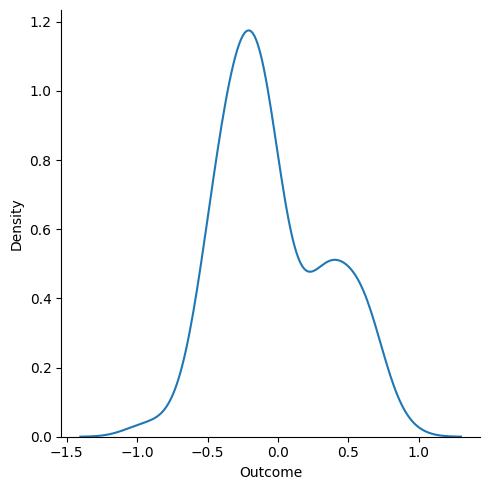

In [93]:
sns.displot(y_test-y_pred, kind='kde')